**PROJECT 2**

# **Task 1**

In [114]:
# Importing all the necessary libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np
# pyright: reportUndefinedVariable=false

In [115]:
# Mounting a Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# Printing present working directory
%pwd

'/content/drive/My Drive/data/realworld2016_dataset/proband9/data'

In [117]:
# Changing directory to the path where our datasets are uploaded in google drive
%cd '/content/drive/MyDrive/data/realworld2016_dataset'

/content/drive/MyDrive/data/realworld2016_dataset


In [118]:
# Printing present working directory
path=%pwd
path

'/content/drive/MyDrive/data/realworld2016_dataset'

In [119]:
# Listing all the directories which contains our datasets
os.listdir()

['proband15',
 'proband14',
 'proband5',
 'proband12',
 'proband4',
 'proband3',
 'proband2',
 'proband11',
 'proband13',
 'proband10',
 'proband8',
 'proband7',
 'proband1',
 'proband6',
 'proband9']

In [120]:
subject=[]
file_names=os.listdir()

In [122]:
# Processing all 15 subjects
dataset_list = []
for filename in file_names:
  #extract subject number and print
    subject.append(filename[7:])
    sub_num=filename[7:]
    print(sub_num)
    os.chdir(path + f'//proband{sub_num}//data//')
    globals()["df_climb_down_chest_{}".format(sub_num)] = pd.read_csv ('acc_climbingdown_chest.csv')
    globals()["df_climb_down_head_{}".format(sub_num)] = pd.read_csv ('acc_climbingdown_head.csv')

    globals()["df_climb_up_chest_{}".format(sub_num)] = pd.read_csv ('acc_climbingup_chest.csv')
    globals()["df_climb_up_head_{}".format(sub_num)] = pd.read_csv ('acc_climbingup_head.csv')

    globals()["df_running_chest_{}".format(sub_num)] = pd.read_csv ('acc_running_chest.csv')
    globals()["df_running_head_{}".format(sub_num)] = pd.read_csv ('acc_running_head.csv')

    globals()["df_walking_chest_{}".format(sub_num)] = pd.read_csv ('acc_walking_chest.csv')
    globals()["df_walking_head_{}".format(sub_num)] = pd.read_csv ('acc_walking_head.csv')

    filename_list = os.listdir(os.chdir(path + f'//proband{sub_num}//data//'))
    dataset_list.append([ x for x in filename_list if "zip" not in x ])

15
14
5
12
4
3
2
11
13
10
8
7
1
6
9


In [123]:
dataset_list = sum(dataset_list, [])

In [125]:
#len(dataset_list)
#check
#df_climb_down_chest_11.head()
#print(len(dataset_list))
#dataset_list

# Visibility Graph

In [10]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [11]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.8 MB/s 


In [126]:
list_Method=[]
list_subject_num=[]
list_acc_axis=[]
list_activity=[]
list_body=[]

##NaturalVG

In [127]:
from ts2vg import NaturalVG

#Instead of writing below-like code every time for each dataset, we used a for loop. 

#natural_vg1 = NaturalVG()
#natural_vg1.build(df_climb_down_chest_1['attr_x'][1000:2048])
#natural_ig_g_1 = natural_vg1.as_igraph()

# Creating Natural Visibility Graph for all the datasets

#climb down chest
for i in range(1,16):
  globals()["natural_vg_climb_down_chest{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["natural_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["natural_ig_g_climb_down_chest{}".format(i)] = globals()["natural_vg_climb_down_chest{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing down")
  list_body.append("chest")

#climb down head
for i in range(1,16):
  globals()["natural_vg_climb_down_head{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["natural_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")    
  globals()["natural_ig_g_climb_down_head{}".format(i)] = globals()["natural_vg_climb_down_head{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing down")
  list_body.append("head")

#climb up chest
for i in range(1,16):
  globals()["natural_vg_climb_up_chest{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["natural_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["natural_ig_g_climb_up_chest{}".format(i)] = globals()["natural_vg_climb_up_chest{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing up")
  list_body.append("chest")

#climb up head
for i in range(1,16):
  globals()["natural_vg_climb_up_head{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["natural_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["natural_ig_g_climb_up_head{}".format(i)] = globals()["natural_vg_climb_up_head{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing up")
  list_body.append("head")

#running chest
for i in range(1,16):
  globals()["natural_vg_running_chest{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["natural_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["natural_ig_g_running_chest{}".format(i)] = globals()["natural_vg_running_chest{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("running")
  list_body.append("chest")

#running head
for i in range(1,16):
  globals()["natural_vg_running_head{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["natural_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["natural_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")          
  globals()["natural_ig_g_running_head{}".format(i)] = globals()["natural_vg_running_head{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("running")
  list_body.append("head")

#walking chest
for i in range(1,16):
  globals()["natural_vg_walking_chest{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")    
  if(i%3==2):
    globals()["natural_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")  
  else:
    globals()["natural_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")  
  globals()["natural_ig_g_walking_chest{}".format(i)] = globals()["natural_vg_walking_chest{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("walking")
  list_body.append("chest")

#walking head
for i in range(1,16):
  globals()["natural_vg_walking_head{}".format(i)] = NaturalVG()
  if(i%3==1):
    globals()["natural_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")     
  if(i%3==2):
    globals()["natural_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")     
  else:
    globals()["natural_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")  
  globals()["natural_ig_g_walking_head{}".format(i)] = globals()["natural_vg_walking_head{}".format(i)].as_igraph()
  list_Method.append("NVG")
  list_subject_num.append(f"{i}")
  list_activity.append("walking")
  list_body.append("head")

In [128]:
#test
#print(natural_ig_g_walking_head15)
#list_acc_axis

##HorizontalVG

In [129]:
from ts2vg import HorizontalVG

#Instead of writing below-like code every time for each dataset, we used a for loop.  

#horizontal_vg1 = HorizontalVG()
#horizontal_vg1.build(df_climb_down_chest_1['attr_x'][1000:2048])
#horizontal_ig_g_1 = horizontal_vg1.as_igraph()


# Creating Horizontal Visibility Graph for all the datasets

#climb down chest
for i in range(1,16):
  globals()["horizontal_vg_climb_down_chest{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["horizontal_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_climb_down_chest{}".format(i)].build(globals()["df_climb_down_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["horizontal_ig_g_climb_down_chest{}".format(i)] = globals()["horizontal_vg_climb_down_chest{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing down")
  list_body.append("chest")

#climb down head
for i in range(1,16):
  globals()["horizontal_vg_climb_down_head{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["horizontal_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_climb_down_head{}".format(i)].build(globals()["df_climb_down_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")    
  globals()["horizontal_ig_g_climb_down_head{}".format(i)] = globals()["horizontal_vg_climb_down_head{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing down")
  list_body.append("head")

#climb up chest
for i in range(1,16):
  globals()["horizontal_vg_climb_up_chest{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  elif(i%3==2):
    globals()["horizontal_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_climb_up_chest{}".format(i)].build(globals()["df_climb_up_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["horizontal_ig_g_climb_up_chest{}".format(i)] = globals()["horizontal_vg_climb_up_chest{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing up")
  list_body.append("chest")

#climb up head
for i in range(1,16):
  globals()["horizontal_vg_climb_up_head{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["horizontal_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_climb_up_head{}".format(i)].build(globals()["df_climb_up_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["horizontal_ig_g_climb_up_head{}".format(i)] = globals()["horizontal_vg_climb_up_head{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("climbing up")
  list_body.append("head")

#running chest
for i in range(1,16):
  globals()["horizontal_vg_running_chest{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["horizontal_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_running_chest{}".format(i)].build(globals()["df_running_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")
  globals()["horizontal_ig_g_running_chest{}".format(i)] = globals()["horizontal_vg_running_chest{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("running")
  list_body.append("chest")

#running head
for i in range(1,16):
  globals()["horizontal_vg_running_head{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")
  if(i%3==2):
    globals()["horizontal_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")
  else:
    globals()["horizontal_vg_running_head{}".format(i)].build(globals()["df_running_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")          
  globals()["horizontal_ig_g_running_head{}".format(i)] = globals()["horizontal_vg_running_head{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("running")
  list_body.append("head")

#walking chest
for i in range(1,16):
  globals()["horizontal_vg_walking_chest{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")    
  if(i%3==2):
    globals()["horizontal_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")  
  else:
    globals()["horizontal_vg_walking_chest{}".format(i)].build(globals()["df_walking_chest_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")  
  globals()["horizontal_ig_g_walking_chest{}".format(i)] = globals()["horizontal_vg_walking_chest{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("walking")
  list_body.append("chest")

#walking head
for i in range(1,16):
  globals()["horizontal_vg_walking_head{}".format(i)] = HorizontalVG()
  if(i%3==1):
    globals()["horizontal_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_x'][1000:2048])
    list_acc_axis.append("x")     
  if(i%3==2):
    globals()["horizontal_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_y'][1000:2048])
    list_acc_axis.append("y")     
  else:
    globals()["horizontal_vg_walking_head{}".format(i)].build(globals()["df_walking_head_{}".format(i)]['attr_z'][1000:2048])
    list_acc_axis.append("z")  
  globals()["horizontal_ig_g_walking_head{}".format(i)] = globals()["horizontal_vg_walking_head{}".format(i)].as_igraph()
  list_Method.append("HVG")
  list_subject_num.append(f"{i}")
  list_activity.append("walking")
  list_body.append("head")

In [130]:
#test
#print(horizontal_ig_g_walking_head14)
#list_Method

### Compute average degree, network diameter, and average path length

In [131]:
list_avg_degree=[]
list_network_diameter=[]
list_avg_path_length=[]

In [132]:
# Natural VG - average degree, network diameter, and average path length

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_climb_down_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_climb_down_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_climb_down_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_climb_down_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_climb_down_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_climb_down_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_climb_up_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_climb_up_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_climb_up_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_climb_up_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_climb_up_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_climb_up_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_running_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_running_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_running_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_running_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_running_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_running_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_walking_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_walking_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_walking_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["natural_ig_g_walking_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["natural_ig_g_walking_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["natural_ig_g_walking_head{}".format(i)].average_path_length())


In [133]:
#list_avg_degree

In [134]:
# Horizontal VG - average degree, network diameter, and average path length

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_climb_down_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_climb_down_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_climb_down_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_climb_down_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_climb_down_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_climb_down_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_climb_up_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_climb_up_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_climb_up_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_climb_up_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_climb_up_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_climb_up_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_running_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_running_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_running_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_running_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_running_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_running_head{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_walking_chest{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_walking_chest{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_walking_chest{}".format(i)].average_path_length())

for i in range(1, 16):
  list_avg_degree.append(np.mean(globals()["horizontal_ig_g_walking_head{}".format(i)].degree()))
  list_network_diameter.append(globals()["horizontal_ig_g_walking_head{}".format(i)].diameter())
  list_avg_path_length.append(globals()["horizontal_ig_g_walking_head{}".format(i)].average_path_length())


In [170]:
#len(list_avg_path_length)
#list_avg_path_length

## Tabulate Result

In [171]:
df_table=pd.DataFrame()

In [172]:
# Storing all the calculated data into a dataframe
df_table["Method"]=pd.DataFrame(list_Method)
df_table["Subject"]=pd.DataFrame(list_subject_num)
df_table["Accelerometer axis"]=pd.DataFrame(list_acc_axis)
df_table["Average Degree"]=pd.DataFrame(list_avg_degree)
df_table["Network diameter"]=pd.DataFrame(list_network_diameter)
df_table["Average path length"]=pd.DataFrame(list_avg_path_length)
df_table["Activity"]=pd.DataFrame(list_activity)
#df_table["Head_or_Chest"]=pd.DataFrame(list_body)

In [173]:
# Shape of resultant dataframe
df_table.shape

(240, 7)

In [174]:
# Displaying records
df_table.head(30)

,Method,Subject,Accelerometer axis,Average Degree,Network diameter,Average path length,Activity
0,NVG,1,x,15.620229,16,6.753359,climbing down
1,NVG,2,y,11.585878,46,15.127956,climbing down
2,NVG,3,z,8.446565,10,4.669195,climbing down
3,NVG,4,x,9.715649,9,4.522529,climbing down
4,NVG,5,y,14.368321,8,4.117951,climbing down
5,NVG,6,z,10.444656,9,4.135048,climbing down
6,NVG,7,x,8.744275,10,4.627199,climbing down
7,NVG,8,y,10.463740,13,4.520216,climbing down
8,NVG,9,z,8.793893,8,4.545233,climbing down
9,NVG,10,x,9.772901,11,4.532997,climbing down


## Scatter Plot


Generate  scatter plots: average degree vs network diameter and color the points 
according to walking and running (do this for each accelerometer signal and 
each method (HVH and NVG))

In [175]:
#HVG
df_hvg_walk_run = df_table.loc[(df_table.Method=="HVG") & ((df_table.Activity=="walking") | (df_table.Activity=="running"))]
df_hvg_walk_run.head()

,Method,Subject,Accelerometer axis,Average Degree,Network diameter,Average path length,Activity
180,HVG,1,z,3.971374,19,8.758811,running
181,HVG,2,x,3.500000,264,91.033372,running
182,HVG,3,y,3.979008,16,7.488921,running
183,HVG,4,z,3.961832,20,8.857698,running
184,HVG,5,x,3.807252,102,36.178565,running


In [176]:
#NVG
df_nvg_walk_run = df_table.loc[(df_table.Method=="NVG") & ((df_table.Activity=="walking") | (df_table.Activity=="running"))]
df_nvg_walk_run.head()

,Method,Subject,Accelerometer axis,Average Degree,Network diameter,Average path length,Activity
60,NVG,1,z,8.311069,11,4.672004,running
61,NVG,2,x,9.551527,258,88.202831,running
62,NVG,3,z,6.908397,8,4.743600,running
63,NVG,4,y,6.419847,11,5.163121,running
64,NVG,5,z,8.475191,97,34.721053,running


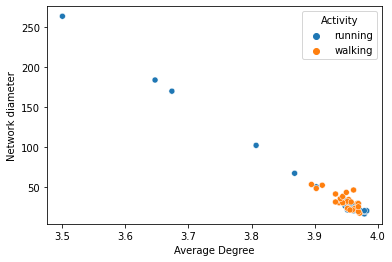

In [177]:
# Horizontal VG, walk/run
sns.scatterplot(x="Average Degree", y="Network diameter", hue="Activity", data=df_hvg_walk_run)

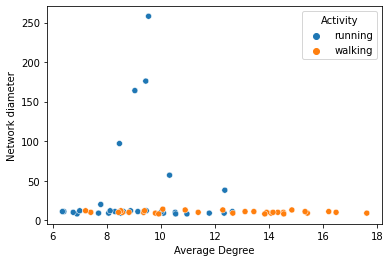

In [178]:
# Natural VG walk/run
sns.scatterplot(x="Average Degree", y="Network diameter", hue="Activity", data=df_nvg_walk_run)

Generate  scatter plots: average degree vs network diameter and color the points 
according to climbing up and climbing down (do this for each accelerometer 
signal and each method (HVH and NVG))

In [179]:
#HVG
df_hvg_climing_up_down = df_table.loc[(df_table.Method=="HVG") & ((df_table.Activity=="climbing up") | (df_table.Activity=="climbing down"))]
df_hvg_climing_up_down.head()

,Method,Subject,Accelerometer axis,Average Degree,Network diameter,Average path length,Activity
120,HVG,1,z,3.935115,37,14.880203,climbing down
121,HVG,2,x,3.893130,60,20.393248,climbing down
122,HVG,3,z,3.938931,38,11.826343,climbing down
123,HVG,4,y,3.958015,30,13.056968,climbing down
124,HVG,5,z,3.967557,26,12.433955,climbing down


In [180]:
#NVG
df_nvg_climing_up_down = df_table.loc[(df_table.Method=="NVG") & ((df_table.Activity=="climbing up") | (df_table.Activity=="climbing down"))]
df_nvg_climing_up_down.head()

,Method,Subject,Accelerometer axis,Average Degree,Network diameter,Average path length,Activity
0,NVG,1,x,15.620229,16,6.753359,climbing down
1,NVG,2,y,11.585878,46,15.127956,climbing down
2,NVG,3,z,8.446565,10,4.669195,climbing down
3,NVG,4,x,9.715649,9,4.522529,climbing down
4,NVG,5,y,14.368321,8,4.117951,climbing down


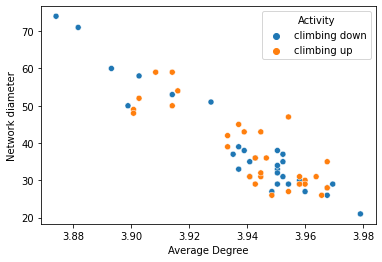

In [181]:
# Horizontal VG, climbing down/up
sns.scatterplot(x="Average Degree", y="Network diameter", hue="Activity", data=df_hvg_climing_up_down)

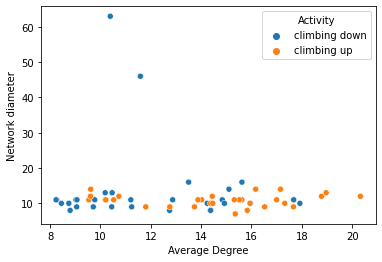

In [182]:
# Natural VG, climbing down/up
sns.scatterplot(x="Average Degree", y="Network diameter", hue="Activity", data=df_nvg_climing_up_down)

**TASK 2**

Compute permutation entropy and complexity for the aforementioned data.
Consider the accelerometer data in all three directions

In [281]:
# A function used to calculate Shannon Entropy
def shannon_entropy(frequency_list):
    frequency_list = [var_element for var_element in frequency_list if var_element != 0]
    shannon_entropy_val = 0.0
    for freq_val in frequency_list:
        shannon_entropy_val += freq_val * np.log(freq_val)
    shannon_entropy_val = -shannon_entropy_val
    return(shannon_entropy_val)

# A function used to calculate Permutation Entropy
def permutation_entropy(var_op):
    var_ordinal_pat = var_op
    maximum_entropy_val = np.log(len(var_ordinal_pat))
    var_d = np.divide(np.array(var_ordinal_pat), float(sum(var_ordinal_pat)))
    return(shannon_entropy(var_d)/maximum_entropy_val)

# A function used to calculate Complexity
def complexity(var_op):
    # Comp_JS = Q_o * JSdivergence * pe where
    # Q_o = Normalizing constant
    # JSdivergence = Jensen-Shannon divergence
    # pe = permutation entopry
    # op = ordinal pattern
    pe_val = permutation_entropy(var_op)
    c1_val = (0.5+((1 - 0.5)/len(var_op)))* np.log(0.5+((1 - 0.5)/len(var_op)))
    c2_val = ((1 - 0.5)/len(var_op))*np.log((1 - 0.5)/len(var_op))*(len(var_op) - 1)
    c3_val = 0.5*np.log(len(var_op))
    Q_o_val = -1/(c1_val+c2_val+c3_val)

    temp_op_prob1_val = np.divide(var_op, sum(var_op))
    temp_op_prob2_val = (0.5*temp_op_prob1_val)+(0.5*(1/len(var_op)))
    JSdivergence_val = (shannon_entropy(temp_op_prob2_val) - 0.5 * shannon_entropy(temp_op_prob1_val) - 0.5 * np.log(len(var_op)))
    Comp_JS_val = Q_o_val * JSdivergence_val * pe_val
    return(Comp_JS_val)

# A function used to generate ordinal patterns
def ordinal_patterns(time_series, embdim_val, embdelay_val):
    var_m, var_t = embdim_val, embdelay_val
    var_x = time_series if isinstance(time_series, np.ndarray) else np.array(time_series) 

    var_tmp = np.zeros((var_x.shape[0], var_m))
    for var_j in range(var_m):
        var_tmp[:, var_j] = np.roll(var_x, var_j*var_t)
    partition_val = var_tmp[(var_t*var_m-1):, :] 
    permutation_val = np.argsort(partition_val)
    var_idx = func_hash(permutation_val)

    var_cnt = np.zeros(np.math.factorial(var_m))
    for var_j in range(var_cnt.shape[0]):
        var_cnt[var_j] = (var_idx == var_j).sum()
    return list(var_cnt[var_cnt != 0].astype(int))

# A function used to create hash permutations
def func_hash(var_x):
    var_m, var_n = var_x.shape
    if var_n == 1:
        return np.zeros(var_m)
    return np.sum(np.apply_along_axis(lambda var_y: var_y < var_x[:, 0], 0, var_x), axis=1) * np.math.factorial(var_n-1) + func_hash(var_x[:, 1:]) 

Vary the following parameters:

Embedded Dimension - 3, 4, 5, 6

Embedded Delay - 1, 2, 3

Signal length - 1024, 2048, 4096

In [282]:
# Creating a empty table which will be used to store our final output
final_table = []

# Creating a function which takes all the required parameters and is used to call the permutation entropy method and complexity method
def create_attributes_for_dataframe(data_frame, axis, signal_length, dimension, delay):

  column = "attr" + "_" + axis
  var_ord_pat = ordinal_patterns(data_frame[column][1:signal_length],dimension,delay)
  var_entropy = permutation_entropy(var_ord_pat)
  var_complexity = complexity(var_ord_pat)
  return var_entropy, var_complexity

subject_list = []
for var_i in range(int(len(final_dataframe)/15)):
  for var_i in range(1,16):
    subject_list.append(var_i)
subject = pd.DataFrame(subject_list)

# Traversing through all the datasets 
for file in dataset_list:
  # Declaring values for Dimensions, Delay, Signal Length and Axes
  Embedded_Dimensions =  [3,4,5,6]
  Embedded_Delay = [1,2,3]
  Signal_Length = [1024,2048,4096]
  Axes = ['x', 'y', 'z']
  # Extracting dataset name by removing the extension
  file_name_split = file.split(".")
  base_name = file_name_split[0]
  # Extracting activity name 
  base_name_split = base_name.split("_")
  activity = base_name_split[1]
  # Reading CSVs which are mounted in google drive and storing it in dataframes
  input_data_frame = pd.read_csv(file)

  # Calling attributes function using nested for loops which is used to create the required attributes
  for var_a in Axes:
    for var_sl in Signal_Length:
      for var_di in Embedded_Dimensions:
        for var_de in Embedded_Delay:
          value_entropy, value_complexity = create_attributes_for_dataframe(input_data_frame, var_a, var_sl, var_di, var_de)
          final_table.append((var_a, var_sl, var_di, var_de, value_entropy, value_complexity, activity))

# Storing the required data into the final dataframe
final_dataframe = pd.DataFrame(final_table, columns=['Accelerometer axis', 'Signal_length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])
final_dataframe.insert(0, 'Subject', subject)

Final output table

In [287]:
# Final output table
final_dataframe

,Subject,Accelerometer axis,Signal_length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.887787,0.096236,climbingup
1,2,x,1024,3,2,0.952924,0.043149,climbingup
2,3,x,1024,3,3,0.960517,0.036845,climbingup
3,4,x,1024,4,1,0.836711,0.161189,climbingup
4,5,x,1024,4,2,0.922799,0.085784,climbingup
...,...,...,...,...,...,...,...,...
12955,11,z,4096,5,2,0.671897,0.316645,walking
12956,12,z,4096,5,3,0.773438,0.287803,walking
12957,13,z,4096,6,1,0.588289,0.305333,walking
12958,14,z,4096,6,2,0.717398,0.329424,walking


In [290]:
# Filtering above dataframe to contain only walking and running data for signal length = 4096 and embedded delay = 1
seperating_run_walk = ['running', 'walking']
result_df_walk_run = final_dataframe[final_dataframe['Activity'].isin(seperating_run_walk)]
final_df_walk_run = result_df_walk_run.loc[(result_df_walk_run.Delay==1) & (result_df_walk_run.Signal_length==4096) ]
#final_df_walk_run

# Filtering above dataframe to contain only climbing up and climbing down data for signal length = 4096 and embedded delay = 1
seperating_climb = ['climbingup', 'climbingdown']
result_df_climb = final_dataframe[final_dataframe['Activity'].isin(seperating_climb)]
final_df_climb = result_df_climb.loc[(result_df_climb.Delay==1) & (result_df_climb.Signal_length==4096) ]
#final_df_climb

Generate scatter plots: permutation entropy vs complexity and color the points
according to walking and running (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)

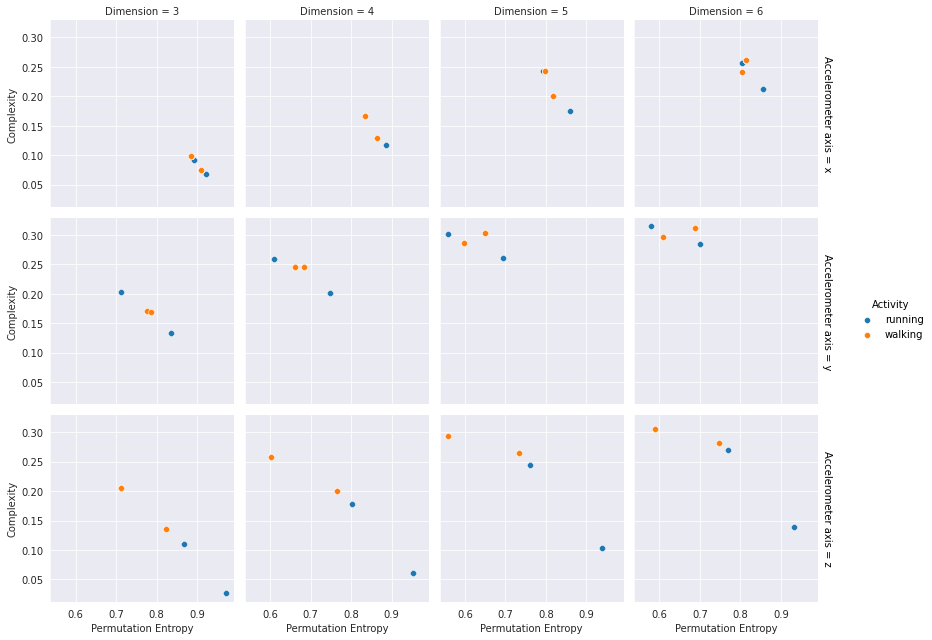

In [291]:
# Scatter Plot for Walking and Running: Permutation Entropy vs Complexity

sp_run_walk =  final_df_walk_run  
with sns.axes_style("darkgrid"):
    grid = sns.FacetGrid(sp_run_walk , col="Dimension", row="Accelerometer axis",hue='Activity', margin_titles=True)
grid.map(sns.scatterplot, "Permutation Entropy", "Complexity")
grid.add_legend()

Generate scatter plots: permutation entropy vs complexity and color the points
according to climbing up and climbing down (for signal length =4096, embedded
delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)

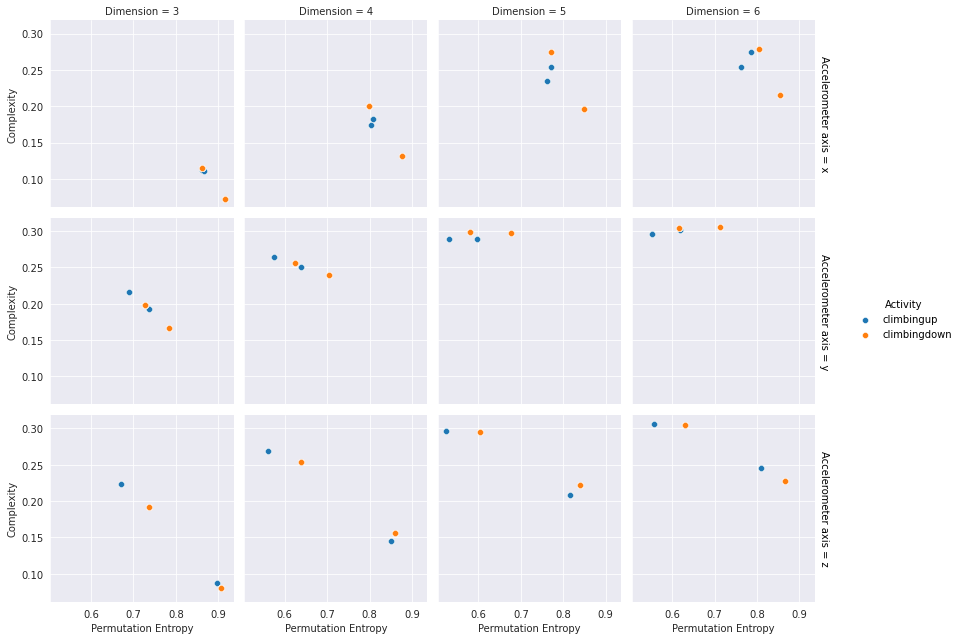

In [293]:
# Scatter Plot for Climbing Up and Climbing Down: Permutation Entropy vs Complexity

sp_climbup_climbdown = final_df_climb
with sns.axes_style("darkgrid"):
    grid = sns.FacetGrid(sp_climbup_climbdown, col="Dimension", row="Accelerometer axis", hue='Activity', margin_titles=True)
grid.map(sns.scatterplot, "Permutation Entropy", "Complexity")
grid.add_legend()